In [1]:
import ROOT

# Standard imports
import numpy as np
import os
import matplotlib.pyplot as plt

# Scikit-HEP packages
import boost_histogram as bh
import aghast
import uproot

Welcome to JupyROOT 6.22/02


In [2]:
# Load macro
ROOT.gInterpreter.ProcessLine('#include "setStyle.C"')

0

### Given two root files (one for data, one for simulation) with histograms with same name inside, print the superimposed plots

In [3]:
histos = {}
histos['data'] = []
histos['mc'] = []

data_file = ROOT.TFile('root_files/tnp/tnp_data.root')
mc_file = ROOT.TFile('root_files/tnp/tnp_mc.root')

variables = [key.GetName() for key in data_file.GetListOfKeys()]
print(variables)

['probePhoIso03', 'probeChIso03worst', 'probeChIso03', 'probePhoIdMVA', 'probeFull5x5_r9', 'probeSigmaIeIe', 'probeCovarianceIeIp', 'probeEtaWidth_Sc', 'probePhiWidth_Sc', 'probeS4']


In [4]:
def draw_boost_plot(var):
    data_histo = data_file.Get(var)
    mc_histo = mc_file.Get(var)
    
    try:
        mc_uncorr_histo = mc_file.Get(var + '_uncorr')
    except:
        mc_uncorr_histo = None

    aghast_data_histo = aghast.from_root(data_histo)
    data_data, data_edges = aghast.to_numpy(aghast_data_histo)

    aghast_mc_histo = aghast.from_root(mc_histo)
    mc_data, mc_edges = aghast.to_numpy(aghast_mc_histo)

    fig, axes = plt.subplots(figsize = (12, 8))

    boost_data_histo = bh.Histogram(bh.axis.Variable(data_edges[1:-1]))
    boost_data_histo[:] = data_data

    boost_mc_histo = bh.Histogram(bh.axis.Variable(mc_edges[1:-1]))
    boost_mc_histo[:] = mc_data

    if x_lims:
        axes.set_xlim([x_min, x_max])
    plt.title(var)
    plt.xlabel(var)

    plt.bar(boost_data_histo.axes[0].centers, boost_data_histo.view(), width = boost_data_histo.axes[0].widths)
    plt.bar(boost_mc_histo.axes[0].centers, boost_mc_histo.view(), width = boost_mc_histo.axes[0].widths)
        
    if mc_uncorr_histo:
        aghast_mc_uncorr_histo = aghast.from_root(mc_uncorr_histo)
        mc_uncorr_data, mc_uncorr_edges = aghast.to_numpy(aghast_mc_uncorr_histo)
            
        boost_mc_uncorr_histo = bh.Histogram(bh.axis.Variable(mc_uncorr_edges[1:-1]))
        boost_mc_uncorr_histo[:] = mc_uncorr_data
            
        plt.bar(boost_mc_uncorr_histo.axes[0].centers, boost_mc_uncorr_histo.view(), width = boost_mc_uncorr_histo.axes[0].widths)

In [5]:
def draw_root_plot(var):     
    data_histo = data_file.Get(var)
    mc_histo = mc_file.Get(var)
    
    try:
        mc_uncorr_histo = mc_file.Get(var + '_uncorr')
    except:
        mc_uncorr_histo = None            
                
    c = ROOT.TCanvas(var, var)
    
    # Get maximum y
    if mc_uncorr_histo:
        y_max = max([data_histo.GetMaximum(), mc_histo.GetMaximum(), mc_uncorr_histo.GetMaximum()])
    else:
        y_max = max([data_histo.GetMaximum(), mc_histo.GetMaximum()])
        
    for h in data_histo, mc_histo:
        h.SetTitle(var)
        h.SetName(var)
    
    # Run style macro
    ROOT.setStyle()
    
    data_histo.SetMaximum(y_max)
    data_histo.SetFillColor(4)
    #data_histo.SetLineColor(4)
    data_histo.Draw('HIST')

    mc_histo.SetFillColorAlpha(3, 0.5)
    #mc_histo.SetLineColor(3)
    mc_histo.Draw('HIST, SAME')
        
    if mc_uncorr_histo:
        mc_uncorr_histo.SetTitle(var)
        mc_uncorr_histo.SetName(var)
        mc_uncorr_histo.SetFillColorAlpha(6, 0.3)
        #mc_uncorr_histo.SetLineColor(6)
        mc_uncorr_histo.Draw('HIST, SAME')

    return c

In [6]:
def draw_stack_plot(var):     
    data_histo = data_file.Get(var)
    mc_histo = mc_file.Get(var)
    
    try:
        mc_uncorr_histo = mc_file.Get(var + '_uncorr')
    except:
        mc_uncorr_histo = None            
                
    c = ROOT.TCanvas(var, var)
        
    for h in data_histo, mc_histo:
        h.SetTitle(var)
        h.SetName(var)
            
    data_histo.SetFillStyle(3004)
    data_histo.SetFillColor(4)

    mc_histo.SetFillStyle(3004)
    mc_histo.SetFillColor(3)
    
    stack = ROOT.THStack()
    
    stack.Add(data_histo)
    stack.Add(mc_histo)
        
    if mc_uncorr_histo:
        mc_uncorr_histo.SetTitle(var)
        mc_uncorr_histo.SetName(var)
        mc_uncorr_histo.SetFillStyle(3004)
        mc_uncorr_histo.SetFillColor(6)
        stack.Add(mc_uncorr_histo)
    
    stack.Draw('HIST')

    return c

#### Plot with ROOT

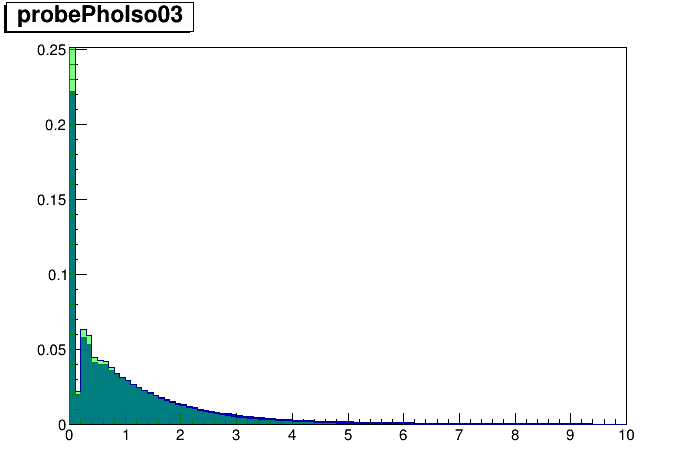

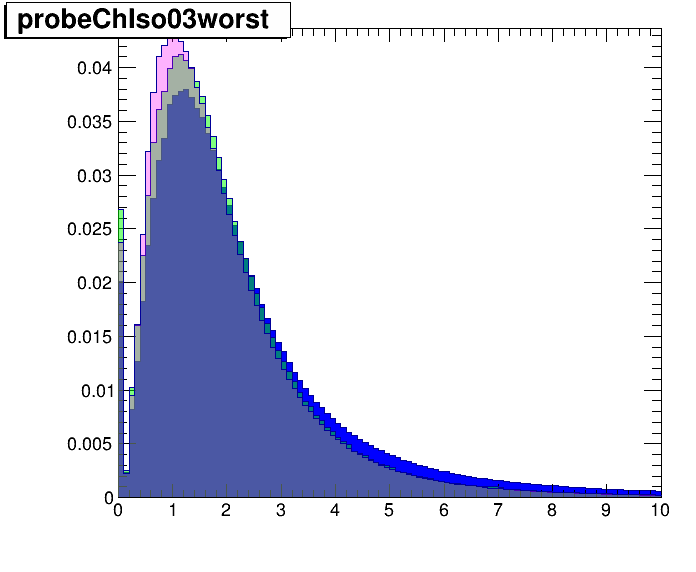

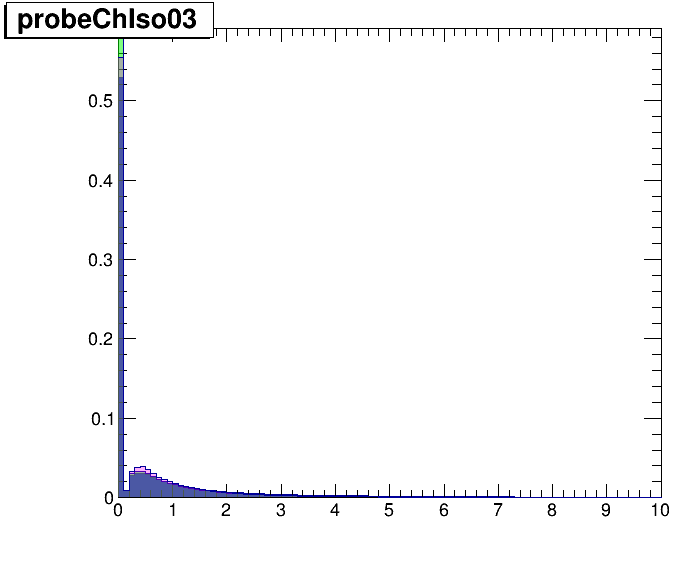

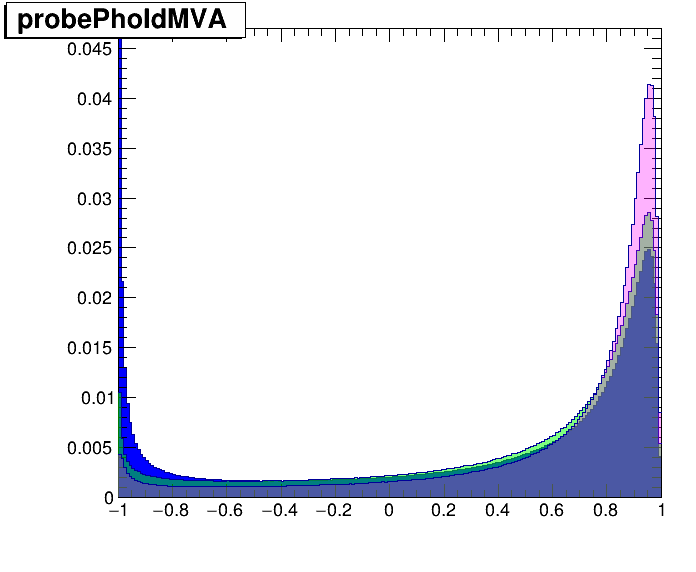

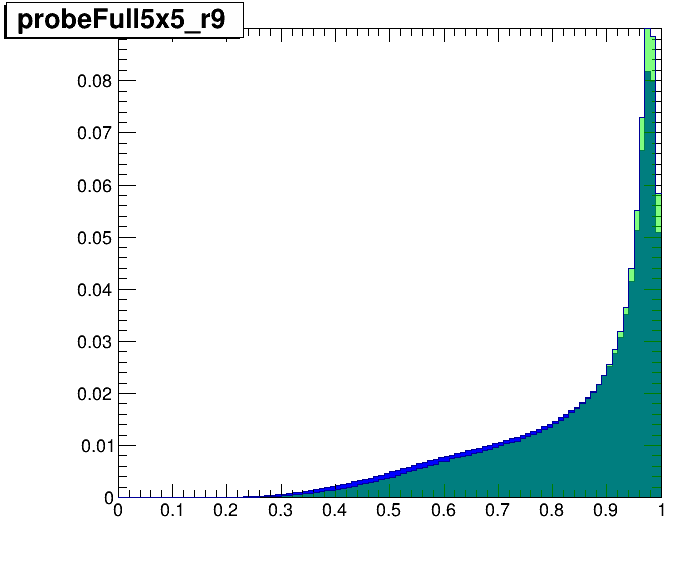

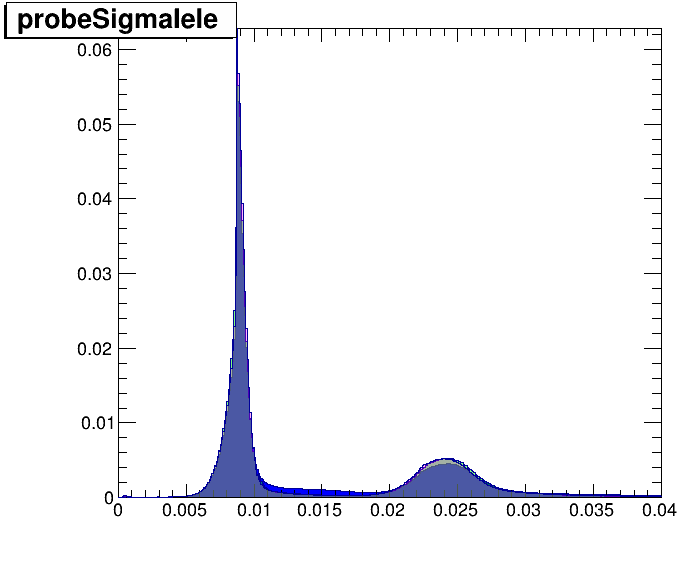

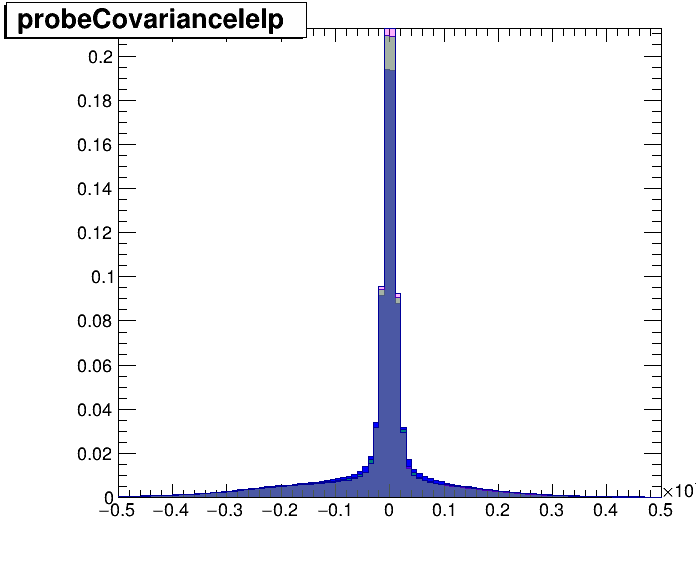

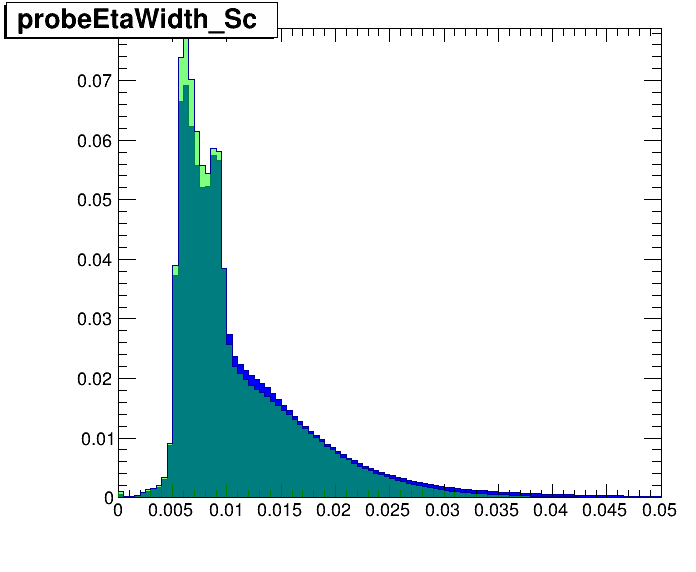

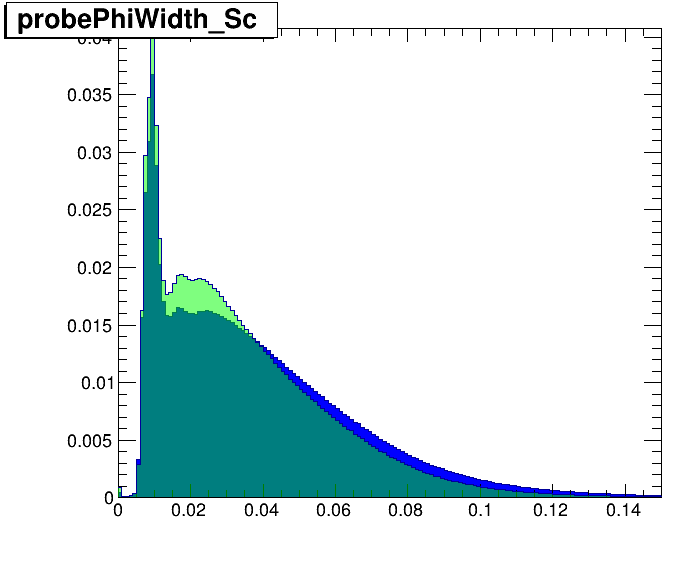

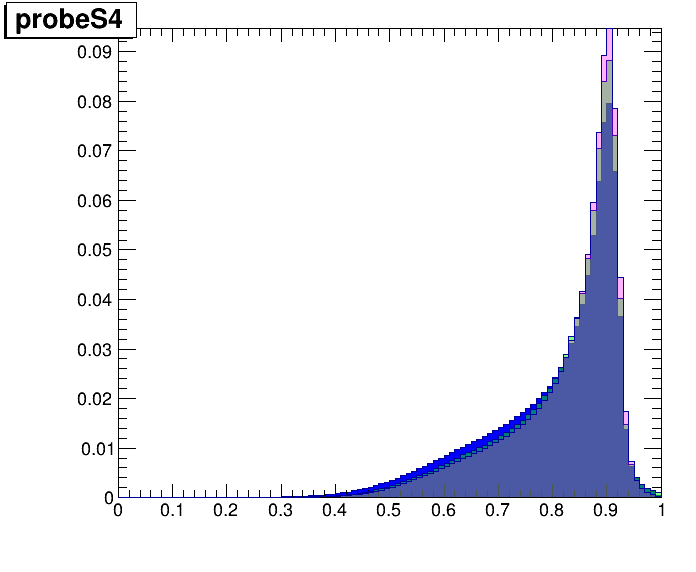

In [7]:
canvases = [draw_root_plot(var) for var in variables]

for c in canvases:
    c.Draw()

#### Plot with aghast and boost-histogram

In [9]:
for var in variables:
    draw_boost_plot(var)

NameError: name 'h' is not defined